# Twitter US Airline Sentiment Classification - Understanding the problem background

In [2]:
# prep to get images in the Colab Notebook
from IPython.display import Image

# allow us to import data from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# make our root and base directories clear
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Fellowship-ai-challenge/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Introduction to the problem

This dataset was curated from Kaggle, and from the looks of it (we'll explore the data more in-depth later), it has tweets about particular airlines with associated labels regarding the sentiment of the tweet. For example, one sample of the data might be "I loved my flight with United!" and the associated label might be "positive." We're given the task of predicting the sentiment category based on on the associated tweet.

So, since we're given input data with non-numerical labels, this is a **supervised, classification** problem. More specifically, it's a **text classification** problem. Before going into the actual ULMFiT model, let's try to understand some of the current approaches for text classification. By doing this, **we can understand some of the problems with simpler approaches, and subsequently understand how more complex approaches address these problems.**

### All machine learning models need to take in numerical inputs, so the first course of action is finding some way to numericalize the text data.

One of the most common ways to numericalize text data is to use a **bag-of-words** approach. Typically, we have a **vocabulary**, and each word in the vocabulary has a particular index. Suppose we have a vocabulary with the words, that we store in an array: ["the, "quick", "brown", "fox", "jumped", "over","lazy","dog"], the sentence "the quick brown fox jumped" would be represented by the vector [1,1,1,1,1,0,0,0]. We store a '1' at an index of the vector when the word with the corresponding index in the vocabulary is present in the sentence. We could also encode the vector based **how many times** the word appears in the sentence.

In this particular problem, we could accumulate a vocabulary of all the words that were used in all the tweets, and the samples would be feature vectors that contained 1's at the corresponding indices if the word were present in the sentence. We're essentially one-hot-encoding categorical variables, just like we would with other categorical variables, only in a specialized way that makes sense in the context of this problem. At this point, we could use any supervised machine learning algorithm and get some results. But is this the best way?

## Problems with an artificial neural network/bag-of-words approach

We could artificial neural network for this problem (we could actually use any supervised machine learning algorithm). Neural networks are notoriously difficult to interpret due to the large number of parameters and various nonlinear activations, but let's try to analyze what the neural network would do.

We know that neural networks learn the weights by minimizing a loss function. They're trying to make it so their predictions closely match the labeled data that's given to them.

Another way of thinking of it is that the network tries to find some sort of **correlation** between its input and output layers. In this case, we would hope that the model would learn what words contribute to a Tweet being positive, neutral, or negative tweet. 

So what are the hidden layers doing in this case? Well, the layers are finding **useful groupings of the inputs, where the groupings are the nodes of the layer based on the outputs that it's given.** Now, since the inputs of a layer may be the outputs of the previous layer, we can think of a hidden layer as finding **intermediate correlations** between the inputs and outputs. This concept of **intermediate, artificially created** datasets, along with nonlinear activation functions, is what makes neural networks so powerful, yet mystifying. We don't know exactly what the weights of the model mean, but we do know that if the model is good, that **similar sentences will lead to similar outputs. Similar Tweets will have similar weights linking them throughout the network, which will in turn lead to a similar prediction.**

What are we getting at here? Well, **since the model will only learn the groupings that are useful to predicting the target task, it won't really learn much about English language**. Theoretically, if the neural network had knowledge of things like syntax and semantics, it would be signficantly easier for it to predict the sentiment of a tweet. It would understand the difference between sentences like "I love that United made me wait for 2 hours before I boarded!" (sarcasm) and "I love United Airlines!" 

So how do we solve this problem? **The answer lies in what we said before about in finding correlation between inputs and outputs.** If we choose inputs and outputs that requires a more sophisticated understanding of language, we could create a better model. Perhaps, we could give the network the task of **predicting the next word in a particular sentence.** This is where **language modeling** comes in. More formally, language modeling involves finding the probability distribution of the next word, conditioned on the previous words in the phrase/sentence.

This is the basic, key idea behind Jeremy Howard's (author of the ULMFiT) approach: similar to the way we do with computer vision problems, we can **transfer the learning that was done from a language model to other NLP tasks, more specifically text classification**.

Another great side effect of this approach is that we have an infinitely large corpus of text to work with. That's the problem with the first approach: we need a significant amount of labeled text data for a particular task. All we need to do is continue to feed various sentences, that could be from any subject domain, into our language model, and theoretically, it should learn the structure of the English language better. It also means that if we want to transfer the knowledge of a single language model to different text classification problems, **our success almost entirely depends on how good our original language model is. So, our problem is mostly reduced to finding the best ways of generally predicting the next word in a sentence, rather than individually creating separate models for particular text classification tasks**.

All of this may seem somewhat abstract at the moment, but it'll make more sense when we get into the details of the ULMFiT approach. **The two main takeaways for now are:**
1. Language modeling forces an understanding of the semantics/syntax of a sentence, while the bag-of-words approach doesn't.
2. Language modeling gives us an infinitely large dataset to work with, unlike the bag-of-words/simple supervised machine learning approach.

### Language Modeling is the key to solving this problem (along with many other NLP problems) so we need to figure out what the most effective ways to model language are, and why they're effective.

## So what's the best way to model language?

One of the first ways of language modeling was using a technique called n-grams, but neural network language models have shown more success/promise. 

Before, we created one-hot representations for sentences, but the issue with this representation was that **it didn't take into account the order of the words**. So we need to not only transition into using **word embeddings** instead of **sentence embeddings**, but also use a **neural architecture that takes into account the order of the words**. The solution to the first problem is using something called an **embedding matrix**, which is actually just a neural layer that can feed into any type of neural network. This is a great diagram that  shows what embedding matrix is, and how it converts a one-hot-encoded representation of a word and converts it to an embedding:

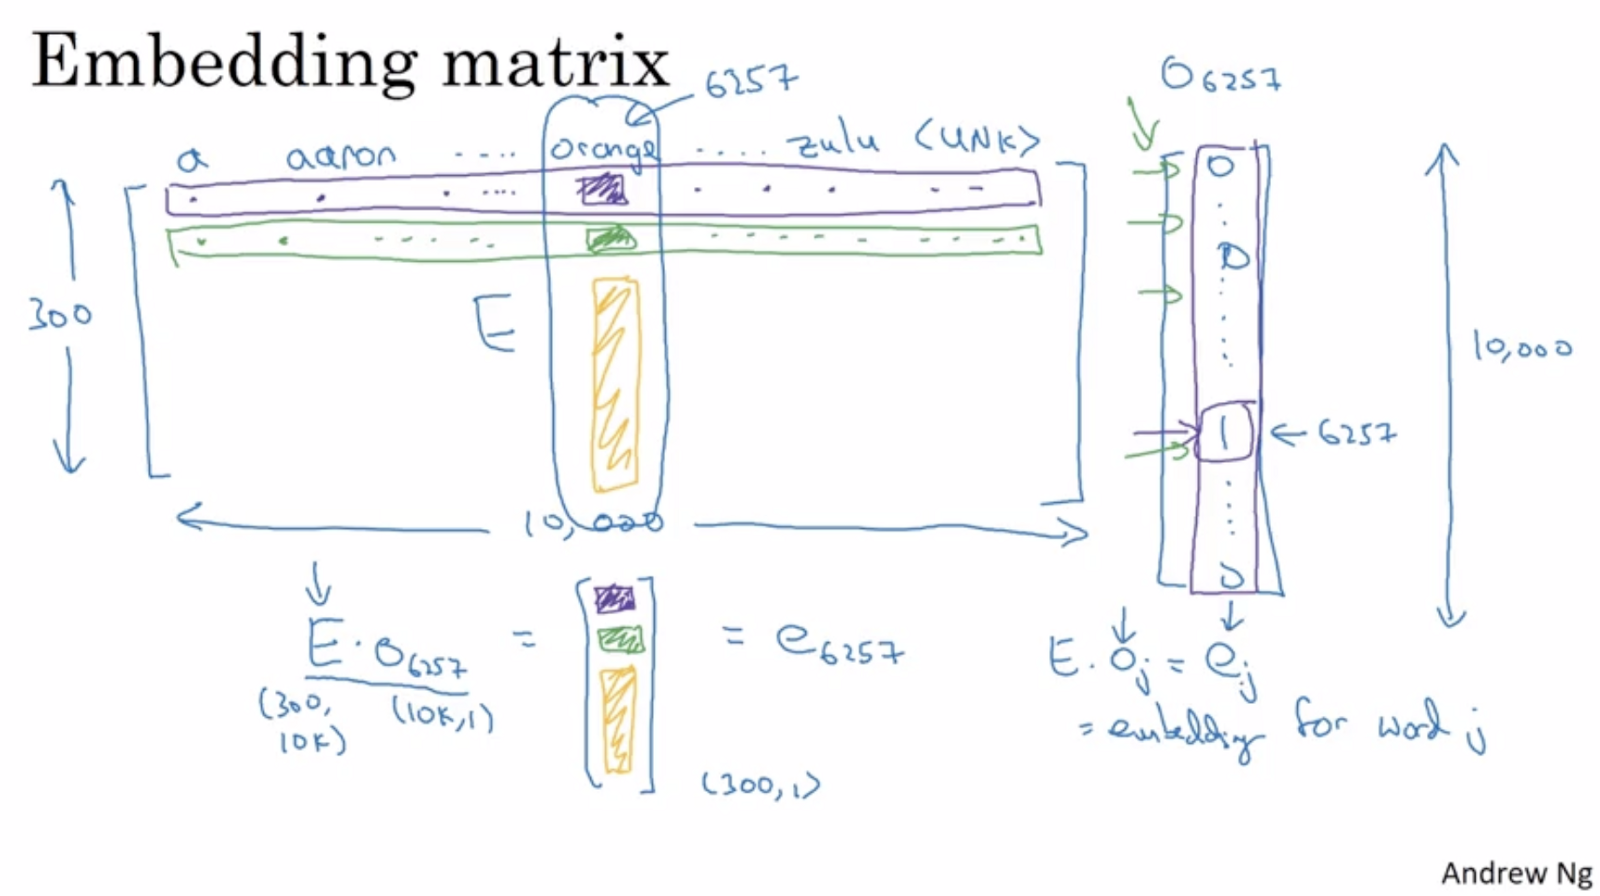

In [17]:
Image(base_dir+'coursera-embedding-matrix.png',width=750,height=600)

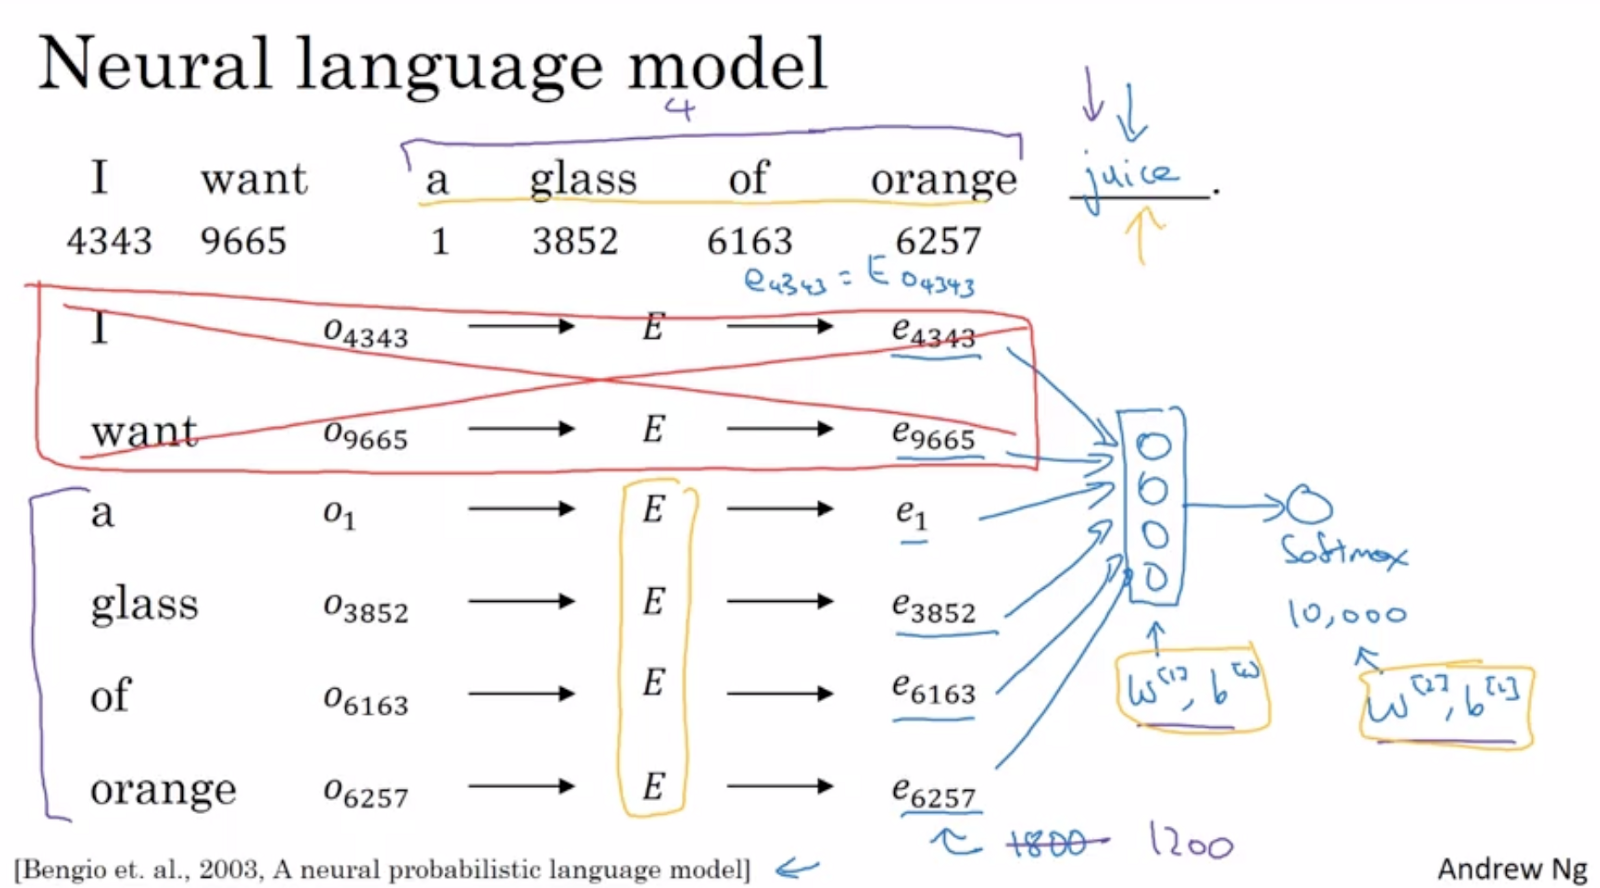

In [18]:
Image(base_dir + 'coursera-em-diagram.png',width=750,height=600)

![](coursera-embedding-matrix.png)
![](coursera-em-diagram.png)(from Andrew Ng's Coursera course)

We won't go into too much detail here, but consider the fact that the matrix is just a tensor of weights, just like a layer in a neural network. We could feed this embedding in and learn embeddings for every word through backpropagation/gradient descent, given a particular target task. **In fact, this is essentially what we were doing before, except here we have a separate embedding for every word**.

## The RNN Language Model

The solution to taking into account order is using an architecture called a **recurrent neural network** (RNN), which allows us to assign a **hidden state** to a particular point in time, and in this case, the particular "point in time" is the word in the sentence. Here's a diagram that describes how we incorporate an **embedding layer** (sometimes referred to as an **encoder**) with a **recurrent layer**:



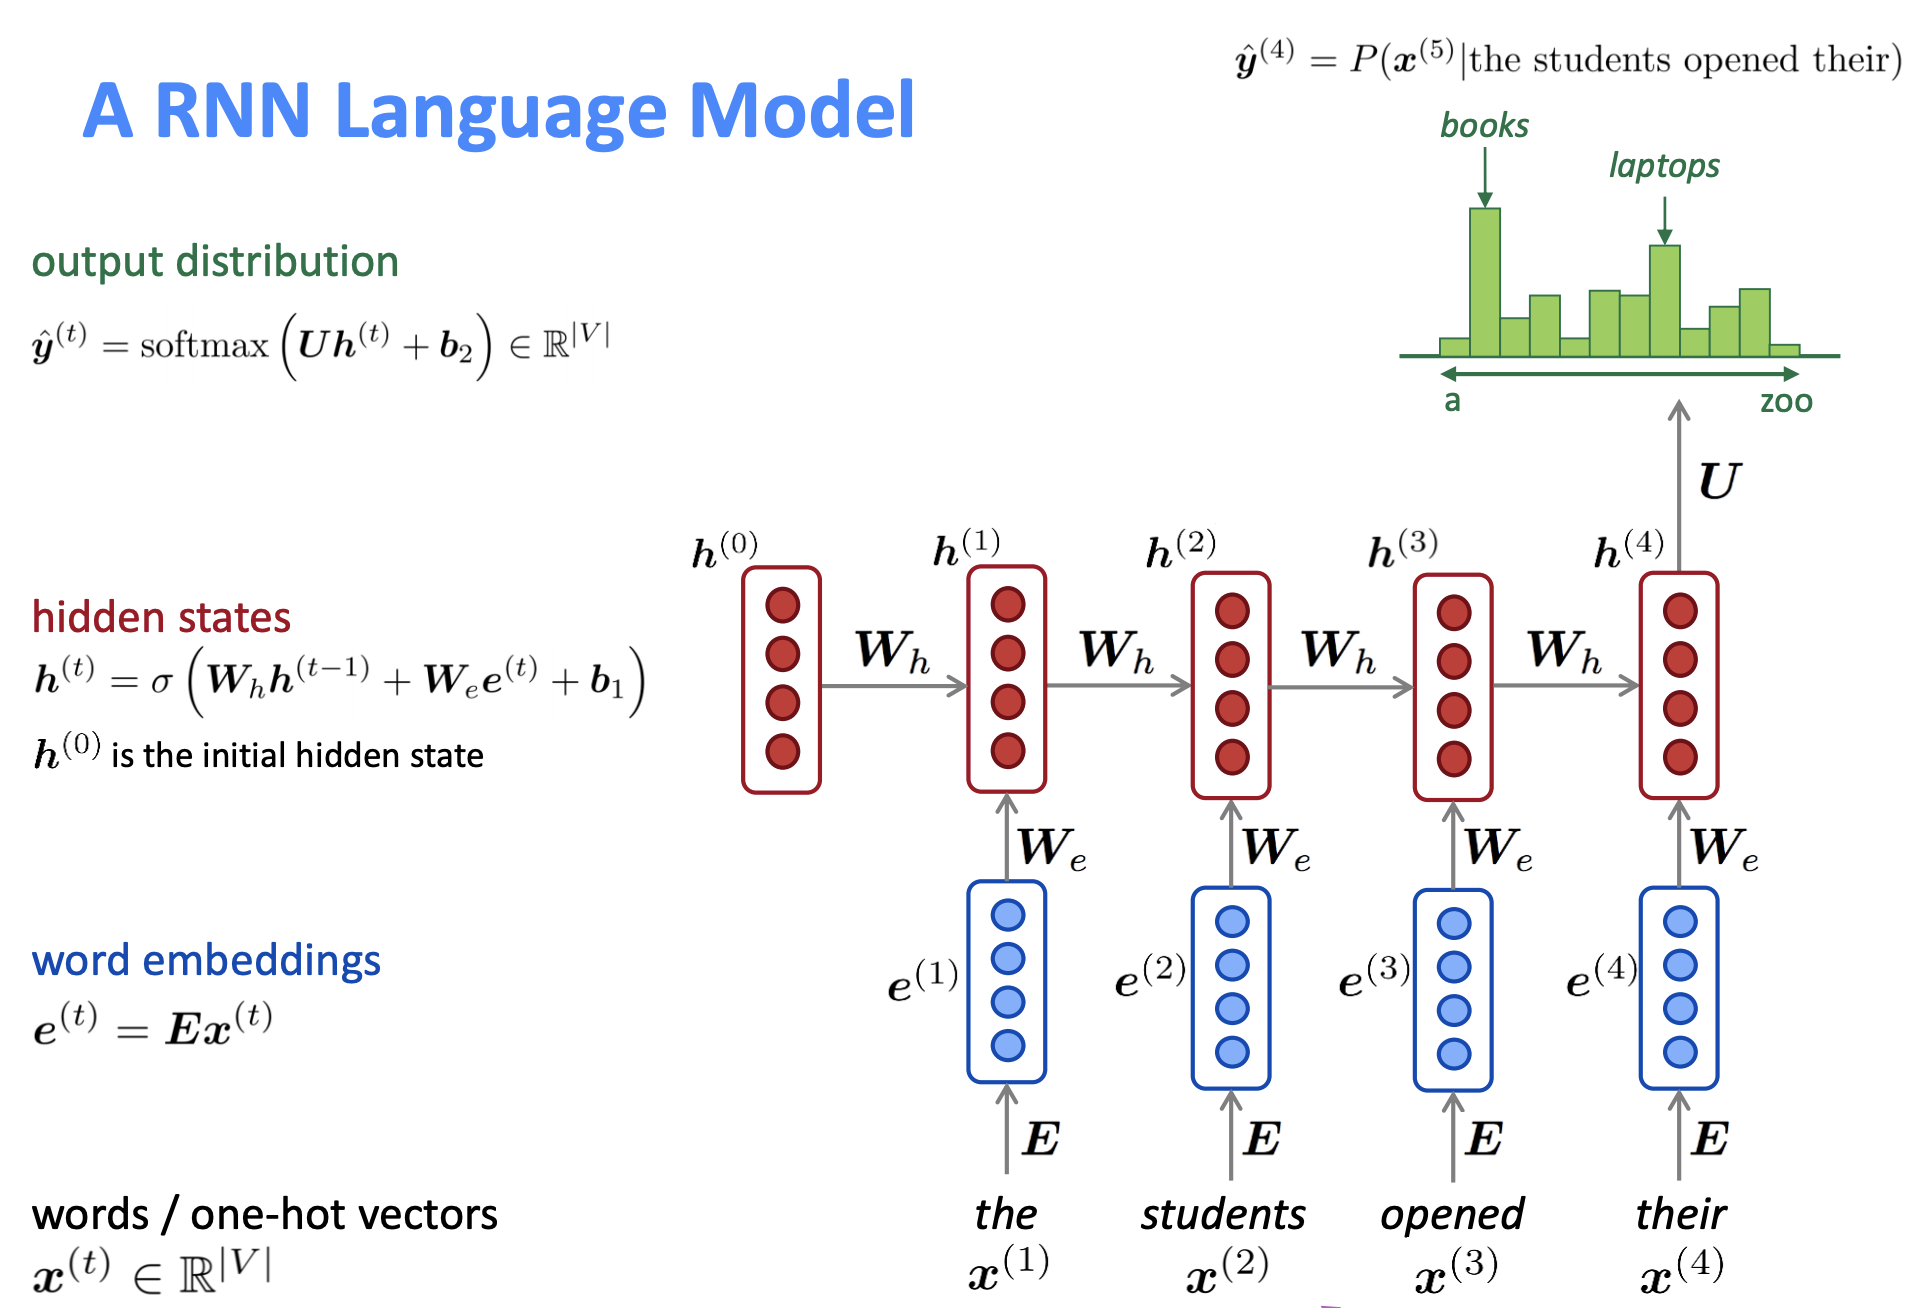

In [20]:
Image(base_dir + 'rnn-language-model-diagram.png',width=750,height=600)

![](rnn-language-model-diagram.png) (taken from Stanford Cs 224n slides)

A few things to note here:
- The **previous word** contributes to a "hidden state" at a particular timestep, along with the word at the current timestep, allowing the forward and backward passes to **take into account order**.
- The **embedding matrix is a parameter of the network**, so we're learning the embedding as a part of training this language model. This differs from using pretrained embeddings, from say, word2vec.
- The dimensions of Wh,We, and U are **completely independent** of how many words we input into the network. So, we don't need to adjust the architecture of the network if we input word sequences that are of **variable lengths.**
- We apply the same transformation Wh to every recurrent cell of the layer: we can think of this as learning a general pattern for sentence structure, regardless of the domain that the sentence comes from.
- The output distribution (sometimes referred to as a **linear decoder**) can be anything, so we can use an RNN to predict anything given a sequence of words, as long as we have a label and an error metric.

## Advantages of a RNN 

To summarize the advantages of the recurrent neural architecture in language modeling, and sequence modeling in general:
1. **RNN's take into account the order of the words.**
2. **They can take in variable-length word sequences.**
3. **The model size stays constant given a particular vocabulary and output distribution.**

## The problem with a vanilla RNN

In practice, it's difficult to create RNN language models that can capture **long-term dependencies**. Consider a backpropagation in a recurrent layer:

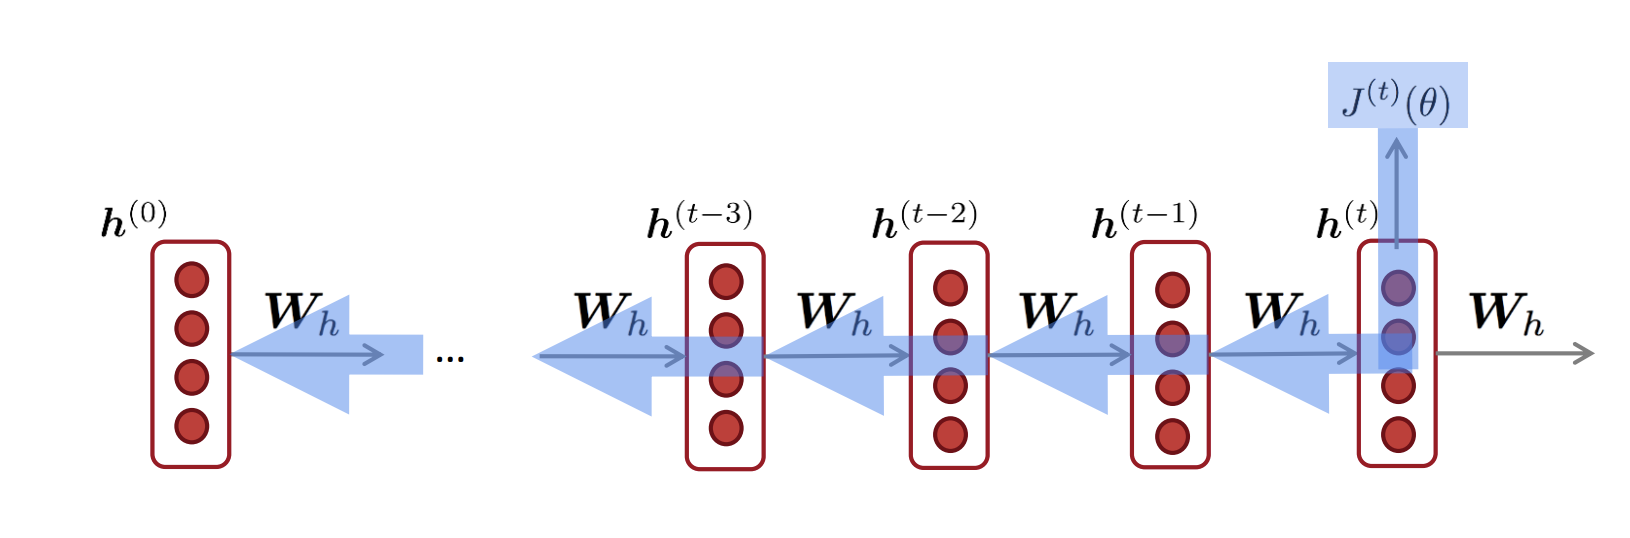

In [27]:
Image(base_dir + 'rnn-backprop.png',width=1000,height=400)

![](vanishing-gradient.png) (Taken from Stanford CS 224n)

We can see that in order to calculate the gradient of a hidden state at a particular point in time, we need to backpropagate and use the chain rule, forcing us to do several multiplications of gradients. The problem of a **vanishing gradient** occurs when we have multiple small gradients that accumulate over the course of backpropagation in a recurrent layer. This typically prevents gradients from moving very far along in the cells in a recurrent layer, as they tend to "vanish" by the multiplications of small gradients. Abstractly, and in the context of predicting the next word in a sentence, it's hard for words that are early in the sentence to give a signal to the prediction of the last word. This example from the Stanford NLP Deep Learning course illustrates this perfectly:

![](lm-vanishing-gradient.png)

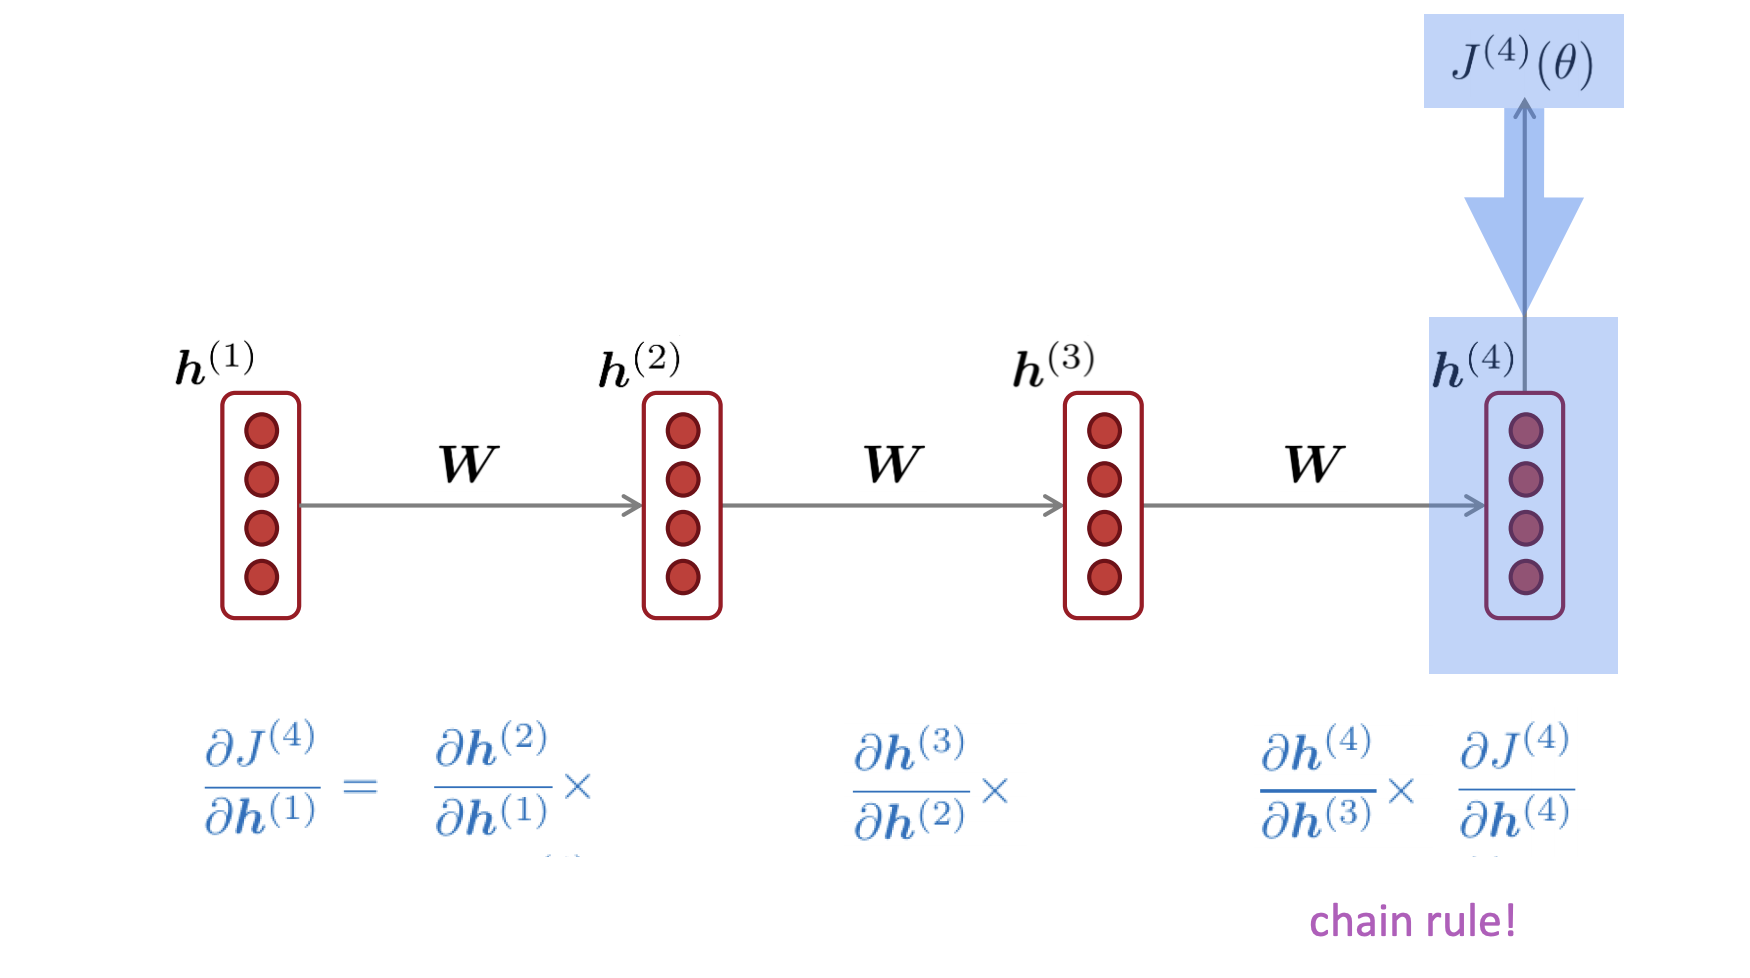

In [29]:
Image(base_dir + 'vanishing-gradient.png',width=850,height=600)

Note that the vanishing gradient problem could happen with any neural network, it just tends to happen with RNN's more because of the numerous backpropagation steps within a recurrent layer.

## Long Short-term Memory

The current standard for solving this problem is using a variant of the RNN architecture called a **long short-term memory (LSTM)**. Here's a diagram of the LSTM cell:

![](lstm-cell.png)

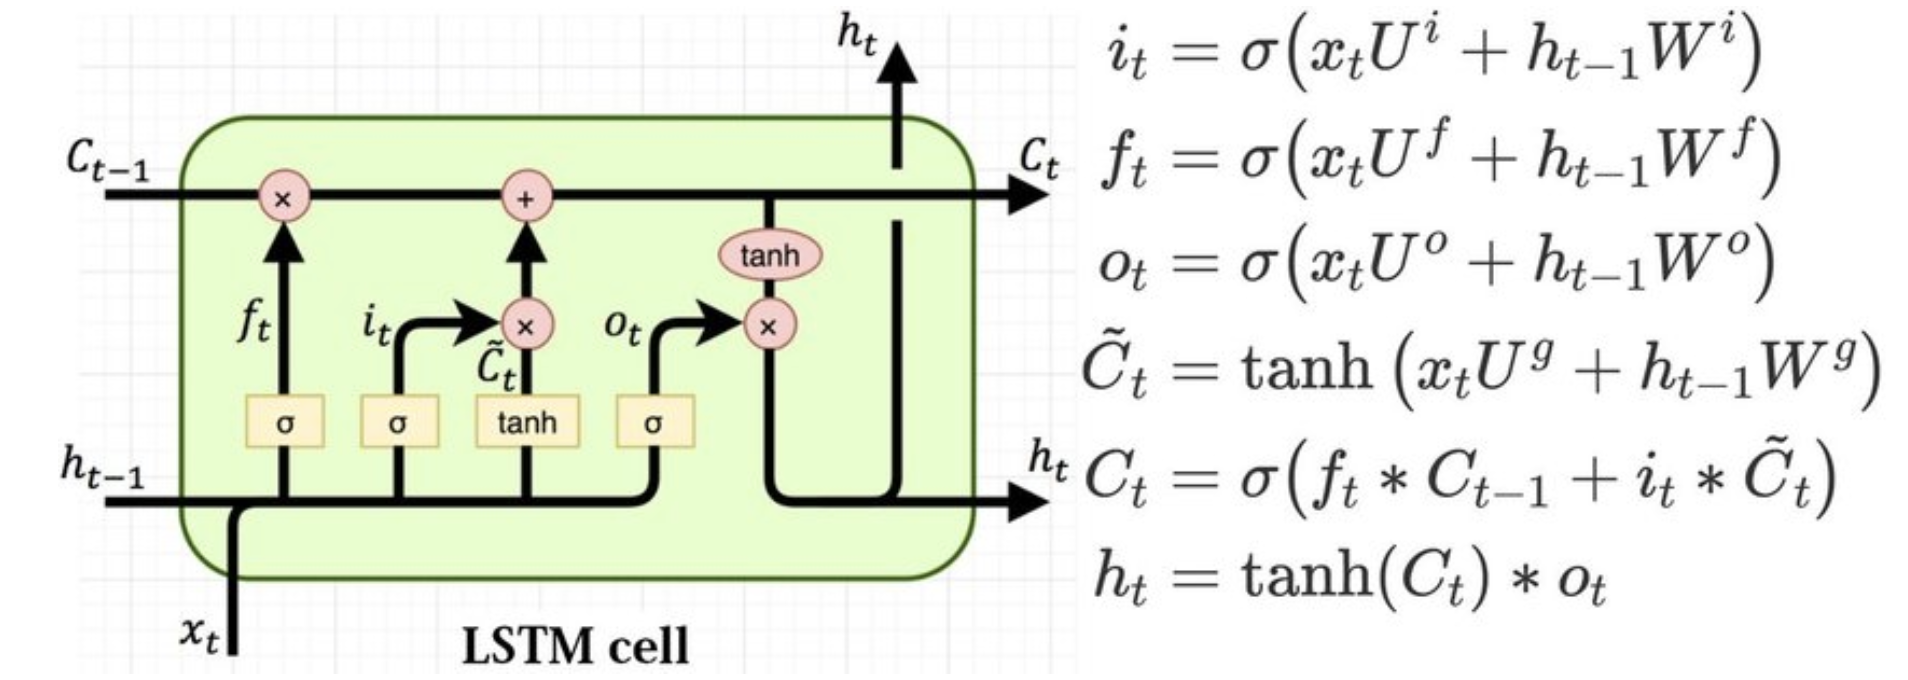

In [32]:
Image(base_dir + 'lstm-cell.png',width=800,height=400)

The reason for why LSTM fixes the vanishing gradient isn't the most intuitive explanation, but the main idea is that LSTM cells have **gates** that control whether or not a particular input is useful, or whether or not we should **forget** it. Another way to think of it is that gradients have other avenues to go if they get overly small, so they don't get repeatedly propagated on one avenue of the network. The key here is that we want to gain intuition as to what the most effective methods are for **modeling language** so that we can create successful text classification methods. **So in the future, when creating novel methods for language modeling, it's crucial to adopt a framework that takes remembering, forgetting, and long-term dependencies into account.**

# The AWD-LSTM - a state-of-the-art language model

It isn't just the theoretical logic that has lead to the adoption of LSTM's: in the paper "Regularizing and Optimizing LSTM Language Models", Stephen Merity produces results from a 3-layer LSTM (called the AWD-LSTM, standing for Averaged Stochastic Gradient Descent Weight-dropped LSTM) that outperform other state-of-the-art language models. **This is also the language model that Jeremy Howard uses in his ULMFiT approach, so it would be helpful to understand why this particular LSTM is effective, and how this translates to state-of-the-art text classification results.**

## The mechanics of the AWD-LSTM

Based on our discussion so far, we can see trends in natural language processing problems. It's difficult to **learn** things like syntax and semantics without trying to **memorize them.** More specifically, **learning (not memorizing) to selectively remember and forget is a key part of language modeling. It makes sense that one of the biggest problems with RNN language models is that they have the tendency to overfit (memorize).** According to Merity, "preventing overfitting within the recurrent connections of an RNN has been an area of extensive research in language modeling."

So it also makes perfect sense why Stephen Merity chose to approach this problem by placing various **dropouts** in the LSTM, rather than other possible approaches that people use to improve neural networks (adding more layers, hyperparameter tuning, batch normalization, etc.). 

### He used his specialized knowledge of the domain/problem to come up with a reasonable approach, and it worked.

Here are the relevant parts of the AWD-LSTM:

## DropConnect

- Merity notes that many implementations of dropouts in RNN's have focused on the cell state (c_t) or hidden state (h_t). Applying these dropouts changes the implementations of typical RNN's, and from an efficiency perspective, make things worse.
- the AWD-LSTM instead applies dropout to hidden-to-hidden weights (U^i, U^f, U^o, and U^g in the above diagram), and not the activations themselves.
- The same weights are used throughout the forward and backward pass of an input sequence, and so the same weights are dropped out through multiple timesteps (as opposed to a different dropout mask being used throughout an epoch of the RNN).

## Variable-length backpropagation sequences 

- If you have a fixed batch size, due to the inherent nature of recurrent backpropagation, the data will not be used as effectively as it could be. The example that the paper gives is that if you have 100 samples to apply gradient descent/backprop to, and you have a fixed backpropagation sequence, any LSTM cell that is divisible by 10 will never any part to backprop into. By varying our backprop sequence, we're distributing the "training" across different parts of the network.
- Merity proposes selecting the sequence from a normal distribution with mean "seq" (a hyperparameter), where seq is selected with probability "p" (another hyperparameter), and (seq/2) is selected with probability "1-p." This way, randomness is introduced with the backpropagation sequences and some parts aren't more tuned than others. At the same time, the average sequence length doesn't fluctuate too much, allowing the network to remain computationally efficient.

## Variational dropout

- This type of dropout refers to the actual dropout of the input to a hidden LSTM cell. - It differs from naive dropout in that it uses the same dropout mask for every input in an input sequence, as well as the outputs for a foroward and backward pass.
- Nonetheless, every sample in a minibatch has a different dropout mask.

## Embedding dropout

- A simple dropout applied to the embedding matrix of the language model.
- This ensures that, in a particular forward/backward pass, specific words are dropped out according to the dropout mask.

**Other highlights** 
- **Weight typing** - typing the weights of the embedding matrix and softmax layer, in order to prevent the model from having to learn the correspondence between the inputs and outputs.
- **Averaged Stochastic Gradient Descent** - an algorithm that averages the weights from the past T iterations, if a particular trigger is set off.

The model ablation analysis shows that the the weight dropouts (DropConnect and variational dropout) were key in reducing model perplexity.

In conclusion, Stephen Merity utilized cutting-edge techniques to improve neural language modeling. He certainly used his **intuitions**, but  he also justified these intuitions by **conducting experiments and producing state-of-the-art results.**

# The ULMFiT Approach

Now that we thoroughly know the current landscape of text classification/NLP problems, we can truly understand what problems ULMFiT aims to solve, and why they might work. Let's go into the actual ULMFiT approach!

## Why ULMFiT?

ULMFiT stands for Universal Language Model Fine-tuning for Text Classification. The main problem with text classification is that we usually don't have a lot of labeled data. In order to leverage the power of deep learning, **we need a lot of data.** Moreover, if we have several text classification tasks, we would need to curate various large, labeled datasets for those tasks. 

As we discussed before, **language modeling doesn't suffer from this problem because we have infinitely large text corpuses that don't need to be labeled to be put into a model**. LM's also do a great job of learning **semantics** and **syntax**, which are key parts of interpreting and subsequently classifying a sentence. Jeremy Howard and Sebastian Ruder figured that if **transfer learning** could be used to achieve state-of-the-art results in computer vision, **language modeling could be used to do so in natural language processing.**

Transfer learning had been done in the form of learning **word embeddings** (which we actually do in the RNN language model), but we weren't using the full potential of neural networks because an embedding matrix is **just a single layer.** Howard and Ruder propose that instead of just training word embeddings, we train a state-of-the-art language model on a large corpus, fine-tune the language model to the text dataset, and then tune the entire model to the text classification task. We'll soon get more into the details of how ULMFiT does this.

**This approach is great because we don't need specific in-domain documents, there isn't specialized feature engineering we need to do, and we can apply it to basically any text classification task.**

Take a look at the 'ulmfit-runthrough' notebook for the actual approach.